In [16]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [17]:
churn_data = pd.read_csv('/home/elliot/PycharmProjects/CSC 495 - Telecom Customer Churn/Datasets/telecom_churn_Processed.csv')

X = churn_data.drop('Churn', axis=1)
y = churn_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

In [18]:
log = LogisticRegression()
log.fit(X_train, y_train)

log_y_pred = log.predict(X_test)
log_y_pred_train = log.predict(X_train)

In [19]:
log_test_as = metrics.accuracy_score(log_y_pred, y_test)
log_train_as = metrics.accuracy_score(log_y_pred_train, y_train)


In [20]:
print(f"Accuracy score for test data : {log_test_as}")
print(f"Accuracy score for train data : {log_train_as}")

print(metrics.classification_report(log_y_pred, y_test))

Accuracy score for test data : 0.8035329599310642
Accuracy score for train data : 0.8055614519210359
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1829
           1       0.53      0.66      0.59       492

    accuracy                           0.80      2321
   macro avg       0.72      0.75      0.73      2321
weighted avg       0.82      0.80      0.81      2321



In [21]:
y_proba_log = log.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba_log)

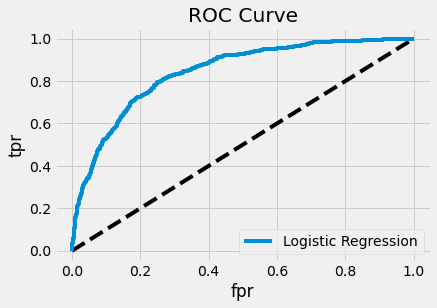

In [22]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();


In [23]:
metrics.roc_auc_score(y_test, y_proba_log)
y_proba_log_train = log.predict_proba(X_train)[:, 1]
metrics.roc_auc_score(y_train, y_proba_log_train)

0.8468121069435638